**PROJEKT - ALGORYTMY UCZENIA MASZYNOWEGO**

--> [Link do Github'a](https://github.com/wiktor-kawa/Algorytmy-Uczenia-Maszynowego---Projekt) <--

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#załadowanie danych do programu
df = pd.read_csv('cars.data', header = None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

**OPIS CECH**<br>
*buying - cena zakupu samochodu*<br>
*maint - cena utrzymania samochodu*<br>
*doors - liczba drzwi*<br>
*persons - pojemność w przeliczeniu na liczbę osób*<br>
*lub_boot - wielkość bagażnika*<br>
*safety - szacunkowe bezpieczeństwo samochodu*<br>
*class - stan akceptowalności pojazdu*<br>

**OPIS ETYKIET**<br>
*unacc - unacceptable*<br>
*acc - acceptable*<br>
*good - good*<br>
*vgood - very good*<br>


In [3]:
#wyświetlenie rozmiaru i początkowej części bazy danych
print(df.shape)
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
#Zliczanie samochodów o określonych atrybutach oraz etykiet
i = 0
liczba_vhigh = 0
liczba_unacc = 0
while i < df.shape[0]: 
    if (df['buying'][i] == "vhigh") & (df['maint'][i] == "vhigh"): #zliczanie liczby aut o wysokiej cenie i drogich w utrymaniu
        liczba_vhigh = liczba_vhigh + 1
    if df['class'][i] == "vgood":
        liczba_unacc = liczba_unacc + 1
    i = i + 1

print('Liczba aut o wysokiej cenie i drogich w utrzymaniu - ' + str(liczba_vhigh))
print("Liczba aut z etykietą 'unacceptable' - " + str(liczba_unacc))

Liczba aut o wysokiej cenie i drogich w utrzymaniu - 108
Liczba aut z etykietą 'unacceptable' - 65


In [5]:
data = df.values
X = data[:,:-1]      #zmienna X - zbiór wektorów cech
y = data[:,-1]       #zmienna y - zbiór etykiet dla obiektów znajdujących się w zbiorze
print("Wymiary tablic X i y:")
print(X.shape, y.shape)
print()
print("Zbiór wektorów cech:")
print(X)
print()
print("Zbiór etykiet:")
print(y)

Wymiary tablic X i y:
(1728, 6) (1728,)

Zbiór wektorów cech:
[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]

Zbiór etykiet:
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


**----->KONWERSJA ATRYBUTÓW TYPU STRING NA INT<-----**

In [6]:
#konwersja atrybutów typu string na int
i=0; j=0; k=0; l=0; m=0; n=0; o=0

labels, uniques = pd.factorize(['low', 'med', 'high', 'vhigh'])
labels_door, uniques_door = pd.factorize(['2', '3', '4', '5more'])
labels_persons, uniques_persons = pd.factorize(['2', '4', 'more'])
labels_lug, uniques_lug = pd.factorize(['small', 'med', 'big'])
labels_class, uniques_class = pd.factorize(['unacc', 'acc', 'good', 'vgood'])

#zmiana atrybutów typu string na int w bazie danych
while i < y.shape[0]:      #->etykiety (unacc = 0, acc = 1, good = 2, vgood = 3)
    if y[i] == 'unacc':
        y[i] = labels_class[0]
    elif y[i] == 'acc':
        y[i] = labels_class[1]
    elif y[i] == 'good':
        y[i] = labels_class[2]
    elif y[i] == 'vgood':
        y[i] = labels_class[3]
    i = i + 1
    
while j < X.shape[0]:    #-> atrybut BUYING (low = 0, med = 1, high = 2, vhigh = 3)
    if X[j][0] == 'low':
        X[j][0] = labels[0]
    elif X[j][0] == 'med':
        X[j][0] = labels[1]
    elif X[j][0] == 'high':
        X[j][0] = labels[2]
    elif X[j][0] == 'vhigh':
        X[j][0] = labels[3]
    j = j + 1
    
while k < X.shape[0]:    #-> atrybut MAINT (low = 0, med = 1, high = 2, vhigh = 3)
    if X[k][1] == 'low':
        X[k][1] = labels[0]
    elif X[k][1] == 'med':
        X[k][1] = labels[1]
    elif X[k][1] == 'high':
        X[k][1] = labels[2]
    elif X[k][1] == 'vhigh':
        X[k][1] = labels[3]
    k = k + 1
    
while l < X.shape[0]:    #-> atrybut DOORS (2 = 0, 3 = 1, 4 = 2, 5more = 3)
    if X[l][2] == '2':
        X[l][2] = labels_door[0]
    elif X[l][2] == '3':
        X[l][2] = labels_door[1]
    elif X[l][2] == '4':
        X[l][2] = labels_door[2]
    elif X[l][2] == '5more':
        X[l][2] = labels_door[3]
    l = l + 1
    
while m < X.shape[0]:    #-> atrybut PERSONS (2 = 0, 4 = 1, more = 2)
    if X[m][3] == '2':
        X[m][3] = labels_persons[0]
    elif X[m][3] == '4':
        X[m][3] = labels_persons[1]
    elif X[m][3] == 'more':
        X[m][3] = labels_persons[2]
    m = m + 1
    
while n < X.shape[0]:    #-> atrybut LUG_BOOT (small = 0, med = 1, big = 2)
    if X[n][4] == 'small':
        X[n][4] = labels_lug[0]
    elif X[n][4] == 'med':
        X[n][4] = labels_lug[1]
    elif X[n][4] == 'big':
        X[n][4] = labels_lug[2]
    n = n + 1
    
while o < X.shape[0]:    #-> atrybut SAFETY (low = 0, med = 1, high = 2)
    if X[o][5] == 'low':
        X[o][5] = labels[0]
    elif X[o][5] == 'med':
        X[o][5] = labels[1]
    elif X[o][5] == 'high':
        X[o][5] = labels[2]
    o = o + 1

print(X)

[[3 3 0 0 0 0]
 [3 3 0 0 0 1]
 [3 3 0 0 0 2]
 ...
 [0 0 3 2 2 0]
 [0 0 3 2 2 1]
 [0 0 3 2 2 2]]


**----->PODZIAŁ DANYCH NA ZBIÓR TRENINGOWY I TESTOWY<-----**

In [7]:
from sklearn import model_selection
podzial = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)  #80% danych - zbiór treningowy, 20% danych - zbiór testowy
X_train, X_test, y_train, y_test = podzial
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)    #wymiary zbiorów testowych i treningowych

X_train=X_train.astype('int')
y_train=y_train.astype('int')
X_test=X_test.astype('int')
y_test=y_test.astype('int')

(1382, 6) (1382,)
(346, 6) (346,)


**----->WYKREŚLANIE HISTOGRAMÓW<-----**

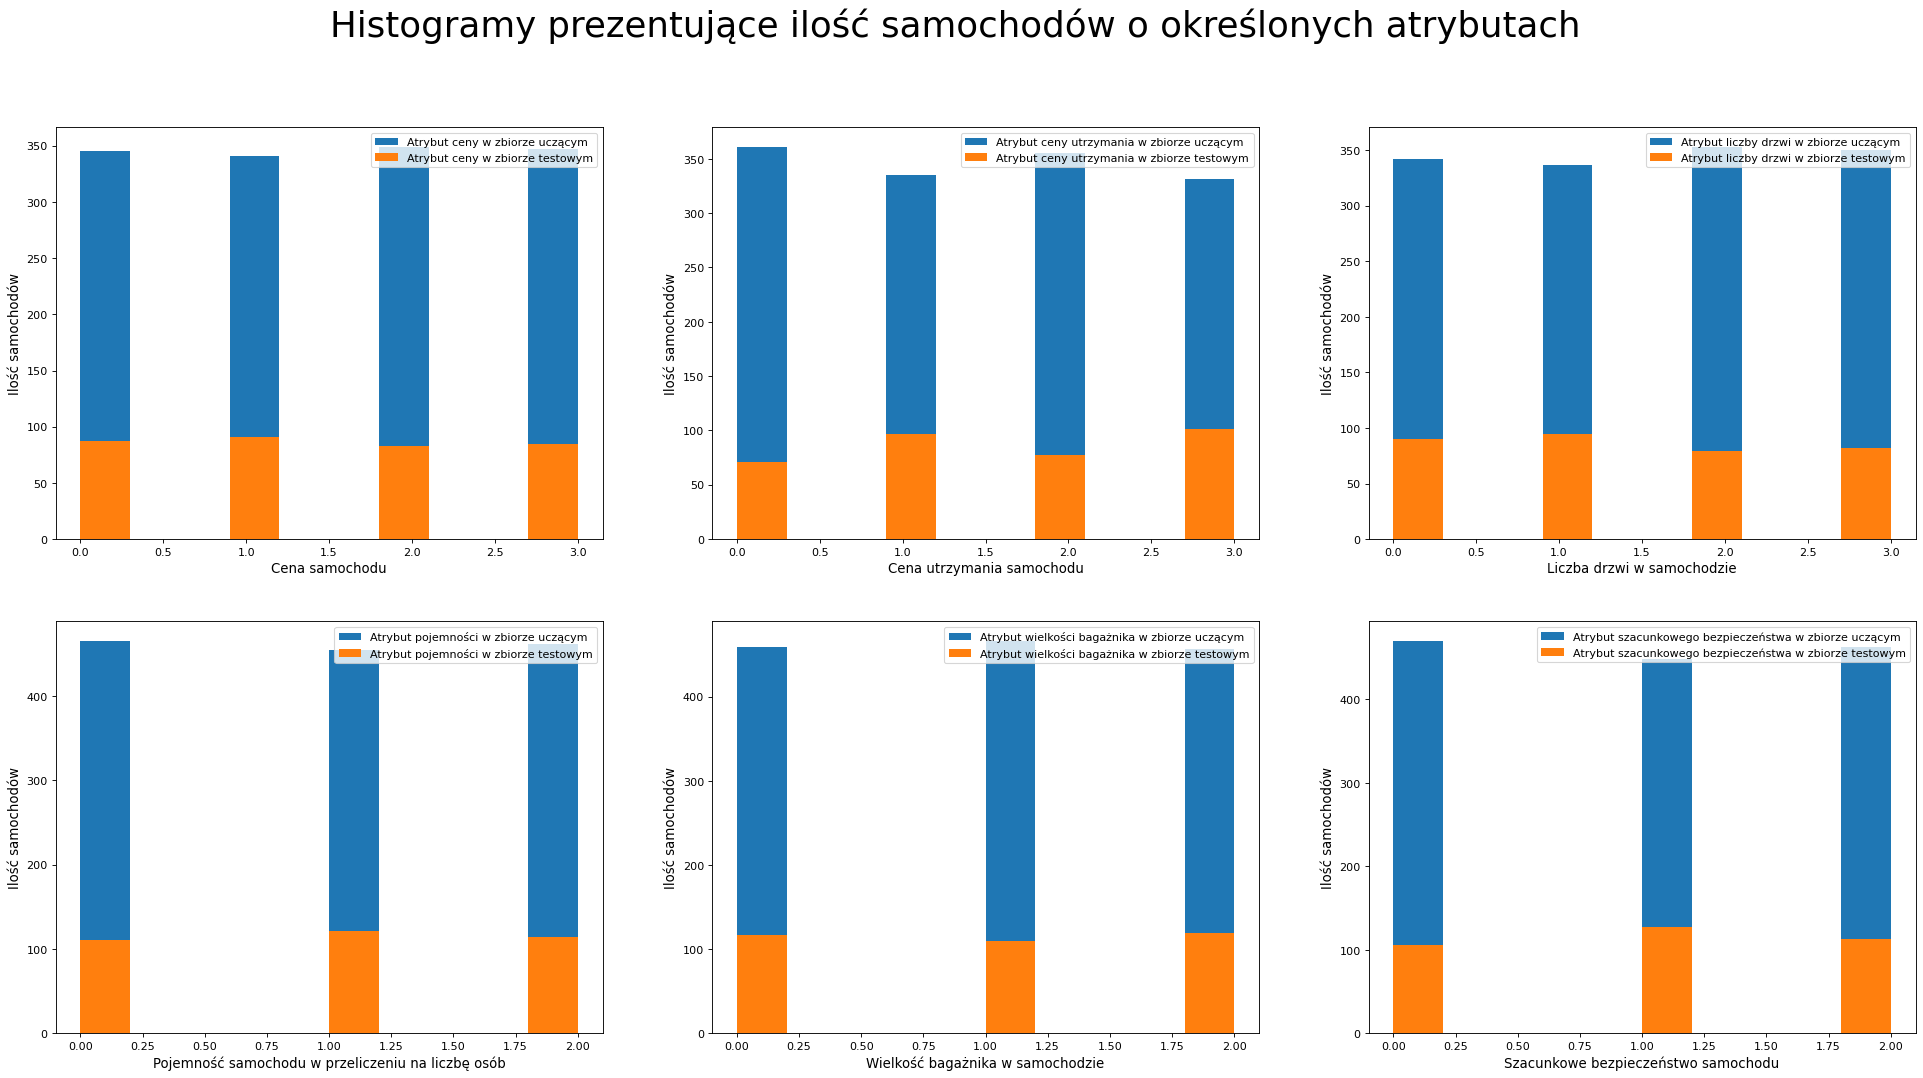

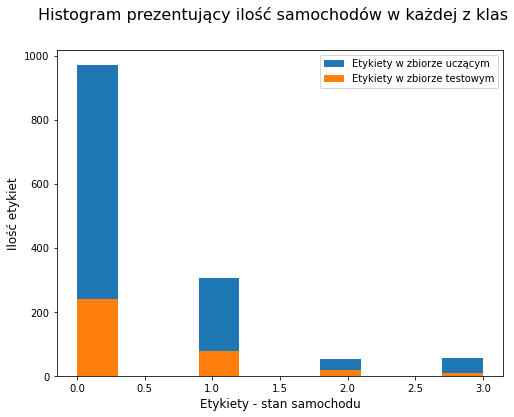

In [8]:
#wykreślanie histogramów atrybutów z podziałem na dane treningowe/testowe
from matplotlib.pyplot import figure
buying_train = X_train[:,0]
buying_test = X_test[:,0]
maint_train = X_train[:,1]
maint_test = X_test[:,1]
doors_train = X_train[:,2]
doors_test = X_test[:,2]
persons_train = X_train[:,3]
persons_test = X_test[:,3]
lug_boot_train = X_train[:,4]
lug_boot_test = X_test[:,4]
safety_train = X_train[:,5]
safety_test = X_test[:,5]

fig = plt.figure(figsize=(30, 15), dpi = 80)
fig.suptitle('Histogramy prezentujące ilość samochodów o określonych atrybutach', fontsize = 32)

fig.add_subplot(2, 3, 1)
plt.hist(buying_train)
plt.hist(buying_test)
plt.xlabel("Cena samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut ceny w zbiorze uczącym","Atrybut ceny w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 2)
plt.hist(maint_train)
plt.hist(maint_test)
plt.xlabel("Cena utrzymania samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut ceny utrzymania w zbiorze uczącym","Atrybut ceny utrzymania w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 3)
plt.hist(doors_train)
plt.hist(doors_test)
plt.xlabel("Liczba drzwi w samochodzie", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut liczby drzwi w zbiorze uczącym","Atrybut liczby drzwi w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 4)
plt.hist(persons_train)
plt.hist(persons_test)
plt.xlabel("Pojemność samochodu w przeliczeniu na liczbę osób", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut pojemności w zbiorze uczącym","Atrybut pojemności w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 5)
plt.hist(lug_boot_train)
plt.hist(lug_boot_test)
plt.xlabel("Wielkość bagażnika w samochodzie", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut wielkości bagażnika w zbiorze uczącym","Atrybut wielkości bagażnika w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 6)
plt.hist(safety_train)
plt.hist(safety_test)
plt.xlabel("Szacunkowe bezpieczeństwo samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut szacunkowego bezpieczeństwa w zbiorze uczącym","Atrybut szacunkowego bezpieczeństwa w zbiorze testowym"], loc = 'upper right')

#wykreślenie histogramu dla etykiet
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Histogram prezentujący ilość samochodów w każdej z klas', fontsize = 16)

plt.hist(y_train)
plt.hist(y_test)
plt.xlabel("Etykiety - stan samochodu", fontsize = 12)
plt.ylabel("Ilość etykiet", fontsize = 12)
plt.legend(["Etykiety w zbiorze uczącym","Etykiety w zbiorze testowym"])

**----->IMPLEMENTACJA FUNKCJI ODPOWIADAJĄCEJ ZA WYŚWIETLANIE METRYK DLA ALGORYTMÓW<-----**

In [9]:
from sklearn import metrics
import warnings

#Funkcja pozwalająca określać podstawowe metryki - accuracy, confusion_matrix, classification_report
def metrics_aum(algorithm, X_test, y_test, y_predicted):
    
    print('METRYKI NA ZBIORZE TESTOWYM DLA -> ' + str(algorithm))
    print('-----------------------------')
    
    #macierz pomyłek
    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
    
    fig, ax = plt.subplots(figsize = (2.5, 2.5))
    ax.matshow(confusion_matrix, cmap = plt.cm.Blues, alpha = 0.3)
    
    for i in range (confusion_matrix.shape[0]):
        for j in range (confusion_matrix.shape[1]):
            ax.text(x = j, y = i, s = confusion_matrix[i, j], va = 'center', ha = 'center')
            
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Rzeczywista etykieta')
    plt.title("MACIERZ POMYŁEK (CONFUSION MATRIX)")
    plt.show()
    print('----------------------------')

    print('CLASSIFICATION REPORT')
    classification_report = metrics.classification_report(y_test, y_predicted)
    print(classification_report)
    print('-----------------------------')

    #skuteczność algorytmu
    accuracy = metrics.accuracy_score(y_test, y_predicted)
    print('ACCURACY')
    print(accuracy)
    print('-----------------------------')
    
    #prawdopodobieństwo przypisania do próbki każdej z etykiet dla pierwszych 3 próbek
    proba = algorithm.predict_proba(X_test[:3])
    print('PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK')
    print(proba)
    print('-----------------------------')
 
    print("Liczba błędnie sklasyfikowanych samochodów ze wszystkich %d w zbiorze testowym wynosi : %d"
    %(X_test.shape[0], (y_test != y_predicted).sum()))
    print('-----------------------------')
    print()

**OPIS UŻYTYCH ALGORYTMÓW**<br>
opisanie algorytmów i wejsc/parametrów przy każdym z nich
I. Drzewa decyzyjne - <br>
II. Naiwny Bayes - <br>
III. MLP (Perceptron wielowartswowy) - <br>

**I ALGORYTM --- DRZEWA DECYZYJNE**

METRYKI NA ZBIORZE TESTOWYM DLA -> DecisionTreeClassifier(max_depth=6, random_state=0)
-----------------------------


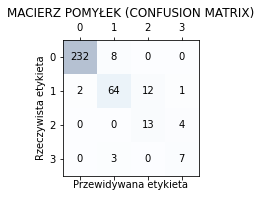

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       240
           1       0.85      0.81      0.83        79
           2       0.52      0.76      0.62        17
           3       0.58      0.70      0.64        10

    accuracy                           0.91       346
   macro avg       0.74      0.81      0.77       346
weighted avg       0.92      0.91      0.92       346

-----------------------------
ACCURACY
0.9132947976878613
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[0.01960784 0.78431373 0.         0.19607843]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 30
-----------------------------



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

clf_tree = DecisionTreeClassifier(max_depth = 6, random_state = 0)
clf_tree.fit(X_train, y_train)

y_predicted_tree = clf_tree.predict(X_test)

metrics_aum(clf_tree, X_test, y_test, y_predicted_tree)

**I ALGORYTM --- DRZEWA DECYZYJNE --- DOBÓR OPTYMALNYCH HIPERPARAMETRÓW W CELU ZWIĘKSZENIA SKUTECZNOŚCI UCZENIA**

Najlepsze hiperparametry to: 
{'criterion': 'entropy', 'max_depth': 11}

METRYKI NA ZBIORZE TESTOWYM DLA -> DecisionTreeClassifier(criterion='entropy', max_depth=11)
-----------------------------


D:\Anaconda\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\venv\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\Anaconda\envs\venv\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitF

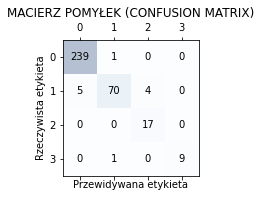

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       240
           1       0.97      0.89      0.93        79
           2       0.81      1.00      0.89        17
           3       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.94      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346

-----------------------------
ACCURACY
0.9682080924855492
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 11
-----------------------------



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "criterion": ['gini', 'entropy', 'log_loss'],
}

search_tree = GridSearchCV(clf_tree, param_grid, n_jobs=2)
search_tree.fit(X_train, y_train)
print("Najlepsze hiperparametry to: ")
print(search_tree.best_params_)
print()

clf_tree2 = DecisionTreeClassifier(max_depth = search_tree.best_params_.setdefault("max_depth"), criterion = search_tree.best_params_.setdefault("criterion"))
clf_tree2.fit(X_train, y_train)
y_predicted_tree2 = clf_tree2.predict(X_test)
metrics_aum(clf_tree2, X_test, y_test, y_predicted_tree2)

**II ALGORYTM ---**
**NAIWNY BAYES**

METRYKI NA ZBIORZE TESTOWYM DLA -> GaussianNB()
-----------------------------


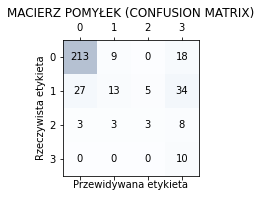

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       240
           1       0.52      0.16      0.25        79
           2       0.38      0.18      0.24        17
           3       0.14      1.00      0.25        10

    accuracy                           0.69       346
   macro avg       0.48      0.56      0.41       346
weighted avg       0.75      0.69      0.69       346

-----------------------------
ACCURACY
0.6907514450867052
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[6.31192130e-01 3.68806900e-01 9.69711000e-07 0.00000000e+00]
 [8.11935573e-01 1.88064427e-01 1.63161873e-10 0.00000000e+00]
 [9.99845400e-01 1.54420938e-04 1.79317764e-07 0.00000000e+00]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 107
-----------------------------



In [12]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()    #priors = None, var_smoothing = 1e-09
clf_nb.fit(X_train, y_train)

y_predicted_nb = clf_nb.predict(X_test)

metrics_aum(clf_nb, X_test, y_test, y_predicted_nb)

**II ALGORYTM --- NAIWNY BAYES --- DOBÓR OPTYMALNYCH HIPERPARAMETRÓW W CELU ZWIĘKSZENIA SKUTECZNOŚCI UCZENIA**

Najlepsze hiperparametry to: 
{'var_smoothing': 0.01}

METRYKI NA ZBIORZE TESTOWYM DLA -> GaussianNB(var_smoothing=0.01)
-----------------------------


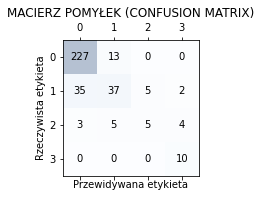

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       240
           1       0.67      0.47      0.55        79
           2       0.50      0.29      0.37        17
           3       0.62      1.00      0.77        10

    accuracy                           0.81       346
   macro avg       0.66      0.68      0.65       346
weighted avg       0.79      0.81      0.79       346

-----------------------------
ACCURACY
0.8063583815028902
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[6.29411323e-01 3.70586717e-01 1.95962306e-06 3.65357470e-19]
 [8.08506386e-01 1.91493613e-01 5.03196609e-10 9.24672881e-24]
 [9.99769925e-01 2.29703251e-04 3.71564729e-07 1.32666948e-75]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 67
-----------------------------



In [13]:
param_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 0.01, 0.1, 1.0, 10.0, 100.0],
}

search_nb = GridSearchCV(clf_nb, param_grid, n_jobs=2)
search_nb.fit(X_train, y_train)
print("Najlepsze hiperparametry to: ")
print(search_nb.best_params_)
print()

clf_nb2 = GaussianNB(priors = None, var_smoothing = search_nb.best_params_.setdefault("var_smoothing"))
clf_nb2.fit(X_train, y_train)
y_predicted_nb2 = clf_nb2.predict(X_test)
metrics_aum(clf_nb2, X_test, y_test, y_predicted_nb2)

**III ALGORYTM ---**
**MLP (PERCEPTRON WIELOWARSTWOWY)**

METRYKI NA ZBIORZE TESTOWYM DLA -> MLPClassifier(alpha=5, max_iter=500)
-----------------------------


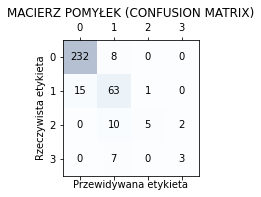

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       240
           1       0.72      0.80      0.75        79
           2       0.83      0.29      0.43        17
           3       0.60      0.30      0.40        10

    accuracy                           0.88       346
   macro avg       0.77      0.59      0.64       346
weighted avg       0.87      0.88      0.87       346

-----------------------------
ACCURACY
0.8757225433526011
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[4.93502013e-01 4.47580849e-01 3.39942560e-02 2.49228820e-02]
 [8.95242389e-01 1.02414047e-01 1.56842999e-03 7.75133667e-04]
 [9.96981859e-01 2.86699399e-03 1.22908662e-04 2.82385856e-05]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 43
-----------------------------



In [14]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(alpha = 5, max_iter = 500)
clf_mlp.fit(X_train, y_train)

y_predicted_mlp = clf_mlp.predict(X_test)

metrics_aum(clf_mlp, X_test, y_test, y_predicted_mlp)

**III ALGORYTM --- MLP (PERCEPTRON WIELOWARSTWOWY) --- DOBÓR OPTYMALYCH HIPERPARAMETRÓW W CELU ZWIĘKSZENIA SKUTECZNOŚCI UCZENIA**

Najlepsze hiperparametry to: 
{'activation': 'relu', 'alpha': 0.001, 'max_iter': 1500}

METRYKI NA ZBIORZE TESTOWYM DLA -> MLPClassifier(alpha=0.001, max_iter=1500)
-----------------------------


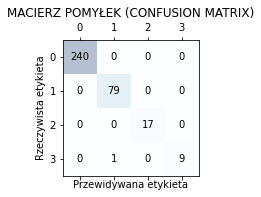

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       0.99      1.00      0.99        79
           2       1.00      1.00      1.00        17
           3       1.00      0.90      0.95        10

    accuracy                           1.00       346
   macro avg       1.00      0.97      0.99       346
weighted avg       1.00      1.00      1.00       346

-----------------------------
ACCURACY
0.9971098265895953
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[8.14964197e-01 1.85035803e-01 5.85303547e-12 1.08815036e-13]
 [9.99170330e-01 8.29670197e-04 5.39237084e-23 9.49017004e-26]
 [1.00000000e+00 5.69251072e-14 2.01646244e-26 1.02924746e-31]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 1
-----------------------------



In [15]:
param_grid = {
    "alpha": [1e-4, 1e-3],
    "max_iter": [1000, 1500],
    "activation": ['tanh', 'relu'],  
}

search_mlp = GridSearchCV(clf_mlp, param_grid, n_jobs = -1)
search_mlp.fit(X_train, y_train)
print("Najlepsze hiperparametry to: ")
print(search_mlp.best_params_)
print()

clf_mlp2 = MLPClassifier(alpha = search_mlp.best_params_.setdefault("alpha"), max_iter = search_mlp.best_params_.setdefault("max_iter"), activation = search_mlp.best_params_.setdefault("activation"))
clf_mlp2.fit(X_train, y_train)
y_predicted_mlp2 = clf_mlp2.predict(X_test)
metrics_aum(clf_mlp2, X_test, y_test, y_predicted_mlp2)

**IV ALGORYTM --- POŁĄCZENIE WSZYSTKICH TRZECH ALGORYTMÓW --- STACKING CLASSIFIER**

METRYKI NA ZBIORZE TESTOWYM DLA -> StackingClassifier(estimators=[('clf_tree2',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=11)),
                               ('clf_nb2', GaussianNB(var_smoothing=0.01)),
                               ('clf_mlp2',
                                MLPClassifier(alpha=0.001, max_iter=1500))],
                   final_estimator=LogisticRegression())
-----------------------------


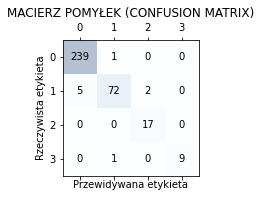

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       240
           1       0.97      0.91      0.94        79
           2       0.89      1.00      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.96      0.95      0.96       346
weighted avg       0.97      0.97      0.97       346

-----------------------------
ACCURACY
0.9739884393063584
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[4.23973828e-01 5.54817498e-01 1.44910421e-02 6.71763186e-03]
 [9.96039192e-01 2.81405485e-03 5.84871701e-04 5.61881639e-04]
 [9.97363218e-01 1.82199669e-03 4.32117621e-04 3.82667992e-04]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 9
-----------------------------



In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('clf_tree2', clf_tree2),
    ('clf_nb2', clf_nb2),
    ('clf_mlp2', clf_mlp2)]

stack_model = StackingClassifier(estimators = estimator_list, final_estimator = LogisticRegression())

stack_model.fit(X_train, y_train)

y_predicted_stack = stack_model.predict(X_test)

metrics_aum(stack_model, X_test, y_test, y_predicted_stack)

**ZALEŻNOŚĆ METRYK OD HIPERPARAMETRÓW**

In [17]:
def metrics_visual(algorithm, X_test, y_test, y_predicted):
    
    #macierz pomyłek
    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

    classification_report = metrics.classification_report(y_test, y_predicted)

    #skuteczność algorytmu
    accuracy = metrics.accuracy_score(y_test, y_predicted)
    
    #prawdopodobieństwo przypisania do próbki każdej z etykiet dla pierwszych 3 próbek
    proba = algorithm.predict_proba(X_test[:3])
 
    probki_testowy = X_test.shape[0]
    bledne_testowy = y_test != y_predicted.sum()
    
    print("Dla: " + str(algorithm))
    print("-Skuteczność: " + str(accuracy))
    print("-Błędnie sklasyfikowanych z %d: %d"
    %(X_test.shape[0], (y_test != y_predicted).sum()))
    print()

In [18]:
metrics_visual(clf_tree, X_test, y_test, y_predicted_tree)
metrics_visual(clf_tree2, X_test, y_test, y_predicted_tree2)
metrics_visual(clf_nb, X_test, y_test, y_predicted_nb)
metrics_visual(clf_nb2, X_test, y_test, y_predicted_nb2)
metrics_visual(clf_mlp, X_test, y_test, y_predicted_mlp)
metrics_visual(clf_mlp2, X_test, y_test, y_predicted_mlp2)

Dla: DecisionTreeClassifier(max_depth=6, random_state=0)
-Skuteczność: 0.9132947976878613
-Błędnie sklasyfikowanych z 346: 30

Dla: DecisionTreeClassifier(criterion='entropy', max_depth=11)
-Skuteczność: 0.9682080924855492
-Błędnie sklasyfikowanych z 346: 11

Dla: GaussianNB()
-Skuteczność: 0.6907514450867052
-Błędnie sklasyfikowanych z 346: 107

Dla: GaussianNB(var_smoothing=0.01)
-Skuteczność: 0.8063583815028902
-Błędnie sklasyfikowanych z 346: 67

Dla: MLPClassifier(alpha=5, max_iter=500)
-Skuteczność: 0.8757225433526011
-Błędnie sklasyfikowanych z 346: 43

Dla: MLPClassifier(alpha=0.001, max_iter=1500)
-Skuteczność: 0.9971098265895953
-Błędnie sklasyfikowanych z 346: 1



**PORÓWNIANIE ALGORYTMÓW Z OPTYMALNYMI HIPERPARAMETRAMI I ALGORYTMU ŁĄCZONEGO**

In [19]:
from sklearn.metrics import accuracy_score

acc_tree = accuracy_score(y_test, y_predicted_tree2)
acc_nb = accuracy_score(y_test, y_predicted_nb2)
acc_mlp = accuracy_score(y_test, y_predicted_mlp2)
acc_stack = accuracy_score(y_test, y_predicted_stack)

acc_test_dict = {'Drzewa Decyzyjne': acc_tree,
                'Naiwny Bayes': acc_nb,
                'MLP': acc_mlp,
                'Połączone algorytmy': acc_stack}

bad_class_tree = (y_test != y_predicted_tree2).sum()
bad_class_nb = (y_test != y_predicted_nb2).sum()
bad_class_mlp = (y_test != y_predicted_mlp2).sum()
bad_class_stack = (y_test != y_predicted_stack).sum()

badly_classified_dict = {'Drzewa Decyzyjne': bad_class_tree,
                        'Naiwny Bayes': bad_class_nb,
                        'MLP': bad_class_mlp,
                        'Połączone algorytmy': bad_class_stack}

acc_df = pd.DataFrame.from_dict(acc_test_dict, orient = 'index', columns = ['Skuteczność'])
badly_class_df = pd.DataFrame.from_dict(badly_classified_dict, orient = 'index', columns = ["Źle sklasyfikowe z %d" %X_test.shape[0]])
data = pd.concat([acc_df, badly_class_df], axis = 1)
data

,Skuteczność,Źle sklasyfikowe z 346
Drzewa Decyzyjne,0.968208,11
Naiwny Bayes,0.806358,67
MLP,0.997110,1
Połączone algorytmy,0.973988,9


**WIZUALIZACJA PROCESU UCZENIA --- KRZYWE UCZENIA**<br>
*Krzywe uczenia zostały wyświetlone dla algorytmów z optymalnymi hiperparametrami i dla algorytmu łączonego*

[learning_curve] Training set sizes: [  3   9  15  21  28  34  40  47  53  59  65  72  78  84  91  97 103 109
 116 122 128 135 141 147 153 160 166 172 179 185 191 197 204 210 216 223
 229 235 241 248 254 260 267 273 279 285 292 298 304 311]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[learning_curve] Training set sizes: [  3   9  15  21  28  34  40  47  53  59  65  72  78  84  91  97 103 109
 116 122 128 135 141 147 153 160 166 172 179 185 191 197 204 210 216 223
 229 235 241 248 254 260 267 273 279 285 292 298 304 311]


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[learning_curve] Training set sizes: [  3   9  15  21  28  34  40  47  53  59  65  72  78  84  91  97 103 109
 116 122 128 135 141 147 153 160 166 172 179 185 191 197 204 210 216 223
 229 235 241 248 254 260 267 273 279 285 292 298 304 311]


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   54.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[learning_curve] Training set sizes: [  3   9  15  21  28  34  40  47  53  59  65  72  78  84  91  97 103 109
 116 122 128 135 141 147 153 160 166 172 179 185 191 197 204 210 216 223
 229 235 241 248 254 260 267 273 279 285 292 298 304 311]


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


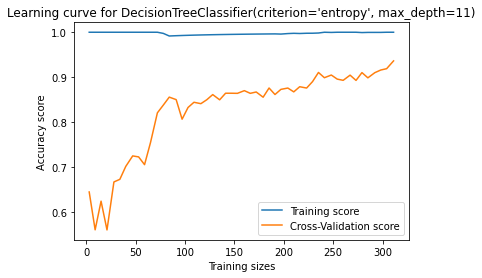

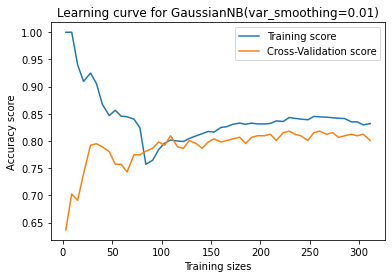

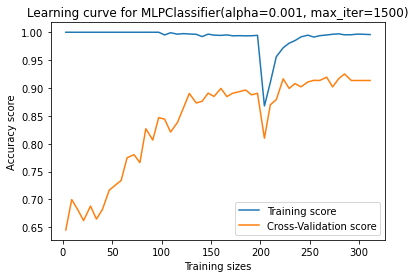

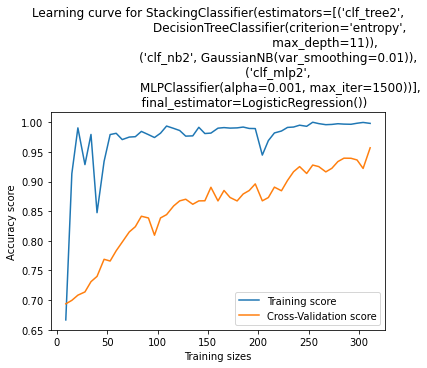

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv = None, n_jobs = None, train_sizes = np.linspace(0.01, 1, 50)):
    
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv = cv, scoring = 'accuracy', n_jobs = n_jobs, train_sizes = train_sizes, verbose = 1, return_times = True)

    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    fit_times_mean = np.mean(fit_times, axis = 1)
    fit_times_std = np.std(fit_times, axis = 1)

    plt.plot(train_sizes, train_mean, label = 'Training score')
    plt.plot(train_sizes, test_mean, label = 'Cross-Validation score')

    plt.title('Learning curve for ' + str(estimator))
    plt.xlabel('Training sizes')
    plt.ylabel('Accuracy score')
    plt.legend(loc = 'best')
    
figure(1)
plot_learning_curve(clf_tree2, X_test, y_test, cv = 10, n_jobs = -1)
figure(2)
plot_learning_curve(clf_nb2, X_test, y_test, cv = 10, n_jobs = -1)
figure(3)
plot_learning_curve(clf_mlp2, X_test, y_test, cv = 10, n_jobs = -1)
figure(4)
plot_learning_curve(stack_model, X_test, y_test, cv = 10, n_jobs = -1)